# Compare the best configurations

In [1]:
# import needed libs

%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

# usual imports for visualization, etc.
import numpy as np
import matplotlib.pyplot as plt

import datetime

# make it reproducible
np.random.seed(0)

# show plots inline
%matplotlib inline

In [2]:
# Some initializations

from envs import SmartVac
from agents import ReinforceAgent, ReinforceWithBaselineAgent, ActorCriticAgent

max_episode_steps = 100
results_folder = 'res/'
figs_folder = 'figs/'

In [8]:
from cycler import cycler
def set_plt_rc():
    font = {'family': 'serif','size': 12}
    
#     SMALL_SIZE = 8
#     MEDIUM_SIZE = 10
#     BIGGER_SIZE = 12

#     plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#     plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#     plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#     plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#     plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#     plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#     plt.rc('font', family='serif')
    plt.rc('font', family=font['family'], size=font['size'])
    
    
#     plt.rc('xtick', labelsize='x-small')
#     plt.rc('ytick', labelsize='x-small')
    
    plt.rc('xtick', labelsize='medium')
    plt.rc('ytick', labelsize='medium')
    
    plt.rc('axes', prop_cycle=(cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                                         '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                         '#bcbd22', '#17becf']) +
                           cycler(linestyle=['-', '--', ':', '-.','-', '--', ':', '-.','-', '--'])))
    
set_plt_rc()

In [26]:
def run_reinforce_agent(alpha):
    AgentClass = ReinforceAgent
    
    params_str = f'alpha_{alpha}_episodes_{episode_count}'

    agent_name = AgentClass.__name__

    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha=alpha)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    mult_avgs = np.array(mult_avgs)
    avgs = np.mean(mult_avgs, axis=0)
    
    results_tmp = f'\n\nAgent: {agent_name} \tAlpha: {alpha}'
    results_tmp += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results_tmp += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results_tmp += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results_tmp)
    
    return mult_avgs

def run_reinforce_with_baseline_agent(alpha_theta=0.1, alpha_w=0.01):
    AgentClass = ReinforceWithBaselineAgent
    
    params_str = f'alpha_theta_{alpha_theta}_alpha_w_{alpha_w}_episodes_{episode_count}'

    agent_name = AgentClass.__name__

    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha_w=alpha_w, alpha_theta=alpha_theta)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    mult_avgs = np.array(mult_avgs)
    avgs = np.mean(mult_avgs, axis=0)
    
    results_tmp = f'\n\nAgent: {agent_name} \tAlpha_w: {alpha_w}\tAlpha_theta: {alpha_theta}'
    results_tmp += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results_tmp += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results_tmp += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results_tmp)
    
    return mult_avgs

def run_actor_critic_agent(alpha_theta=0.1, alpha_w=0.01):
    AgentClass = ActorCriticAgent

    params_str = f'alpha_theta_{alpha_theta}_alpha_w_{alpha_w}_episodes_{episode_count}'

    agent_name = AgentClass.__name__

    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha_w=alpha_w, alpha_theta=alpha_theta)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    mult_avgs = np.array(mult_avgs)
    avgs = np.mean(mult_avgs, axis=0)
    
    results_tmp = f'\n\nAgent: {agent_name} \tAlpha_w: {alpha_w}\tAlpha_theta: {alpha_theta}'
    results_tmp += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results_tmp += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results_tmp += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results_tmp)
    
    return mult_avgs
    
def plot_agent(mult_avgs, agent_name):
    avgs = np.mean(np.array(mult_avgs), axis=0)
    idx = range(len(avgs))
    
    plt.figure(1, figsize=(7,4))
    plt.plot(np.array(idx)*100, avgs, label=agent_name)
#     plt.title(f'Average Return in {episode_count} episodes')
    plt.xlabel(f'Time')
#     plt.ylabel(f'Average Return per {plot_count} episodes')
    plt.ylabel(f'Total Reward on Episode')
    plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')

In [45]:
best_performance = 0.63
env = SmartVac()
num_of_tests = 10
episode_count = 10000
plot_count = int(episode_count / 100)

avgs1 = run_reinforce_agent(alpha=0.125)
avgs2 = run_reinforce_with_baseline_agent(alpha_w=0.5, alpha_theta=0.5)
avgs3 = run_actor_critic_agent(alpha_w=0.125, alpha_theta=0.5)


1 ###################################################################################################
2 ###################################################################################################
3 ###################################################################################################
4 ###################################################################################################
5 ###################################################################################################
6 ###################################################################################################
7 ###################################################################################################
8 ###################################################################################################
9 ###################################################################################################
10 ##############################################################################

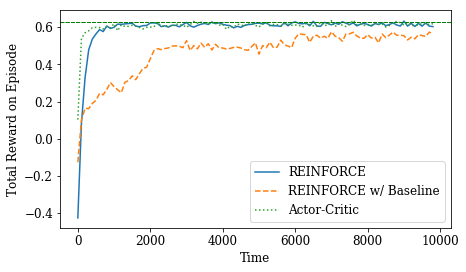

In [46]:
plot_agent(avgs1, 'REINFORCE')
plot_agent(avgs2, 'REINFORCE w/ Baseline')
plot_agent(avgs3, 'Actor-Critic')
plt.legend()
plt.savefig(f'{figs_folder}smart-vac-comp.pdf')
plt.show()

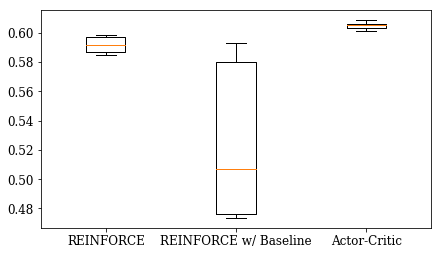

In [47]:
plt.figure(1, figsize=(7,4))
d2 = [np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]]
plt.boxplot(d2, showfliers=False)
ax = plt.gca()
ax.set_xticklabels(['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic'])
plt.savefig(f'{figs_folder}smart-vac-comp-box.pdf')
plt.show()

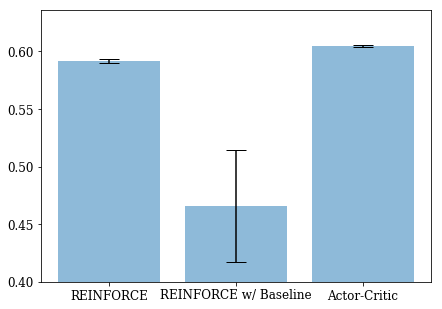

In [69]:
plt.figure(1, figsize=(7,5))
se = np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests)
agents = ['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic']
y = [np.mean(x) for x in [avgs1,avgs2,avgs3]]

plt.bar(range(len(agents)), [np.mean(x) for x in [avgs1,avgs2,avgs3]], alpha=0.5, ecolor='black', capsize=10, yerr=se)
# plt.errorbar(range(len(agents)), y, se, linestyle='None', color='r')
plt.xticks(range(len(agents)), agents)
plt.ylim(bottom=0.4)
plt.savefig(f'{figs_folder}smart-vac-comp-se.pdf')
plt.show()

In [84]:
# plt.figure(1, figsize=(7,10))

# plt.subplot(211)
# d2 = [np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]]
# plt.boxplot(d2, showfliers=False)
# ax = plt.gca()
# ax.set_xticklabels(['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic'])

# ax = plt.subplot(212)
# se = np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests)
# agents = ['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic']
# y = [np.mean(x) for x in [avgs1,avgs2,avgs3]]
# plt.bar(range(len(agents)), [np.mean(x) for x in [avgs1,avgs2,avgs3]], alpha=0.5, ecolor='black', capsize=10, yerr=se)
# plt.xticks(range(len(agents)), agents)
# plt.ylim(bottom=0.4)

# # plt.savefig(f'{figs_folder}smart-vac-comp-se-box.pdf')
# plt.show()

In [66]:
print(np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1))
print([np.mean(x) for x in [avgs1,avgs2,avgs3]])

[0.00506919 0.15354722 0.00221754]
[0.5916686868686868, 0.465410101010101, 0.6048161616161617]


# Compare Best Configuration for negative rewards

In [ ]:
best_performance = -1.37
env = SmartVac(terminal_rewards=(-1,-3))
num_of_tests = 10
episode_count = 10000
plot_count = int(episode_count / 100)

# REINFORCE doesn't work in this settings
avgs1 = run_reinforce_agent(alpha=0.125)
avgs2 = run_reinforce_with_baseline_agent(alpha_theta=0.25, alpha_w=0.25)
avgs3 = run_actor_critic_agent(alpha_theta=0.5, alpha_w=0.25)


1 #############

In [ ]:
# REINFORCE doesn't work in this settings
# plot_agent(avgs1, 'REINFORCE')
plot_agent(avgs2, 'REINFORCE w/ Baseline')
plot_agent(avgs3, 'Actor-Critic')
plt.legend()
plt.savefig(f'{figs_folder}smart-vac-comp.pdf')
plt.show()

In [ ]:
plt.figure(1, figsize=(7,4))
# d2 = [np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]]
d2 = [np.mean(x, axis=1) for x in [avgs2, avgs3]]
plt.boxplot(d2, showfliers=False)
ax = plt.gca()
ax.set_xticklabels(['REINFORCE w/ Baseline', 'Actor-Critic'])
plt.savefig(f'{figs_folder}smart-vac-neg-comp-box.pdf')
plt.show()

In [ ]:
plt.figure(1, figsize=(7,5))
se = np.std([np.mean(x, axis=1) for x in [avgs1, avgs2, avgs3]], axis=1) / np.sqrt(num_of_tests)
agents = ['REINFORCE', 'REINFORCE w/ Baseline', 'Actor-Critic']
y = [np.mean(x) for x in [avgs1,avgs2,avgs3]]

plt.bar(range(len(agents)), [np.mean(x) for x in [avgs1,avgs2,avgs3]], alpha=0.5, ecolor='black', capsize=10, yerr=se)
# plt.errorbar(range(len(agents)), y, se, linestyle='None', color='r')
plt.xticks(range(len(agents)), agents)
plt.ylim(bottom=0.4)
plt.savefig(f'{figs_folder}smart-vac-neg-comp-se.pdf')
plt.show()